First importing modules

In [1]:
from glycowork.motif.draw import GlycoDraw
from glycowork.motif.processing import canonicalize_iupac
from glycowork.motif.draw import plot_glycans_excel
from glycowork.motif.analysis import get_heatmap
from glycowork.motif.draw import annotate_figure
from glycowork.motif.analysis import get_differential_expression
from glycowork.motif.analysis import get_pca
from glycowork.motif.analysis import get_volcano
from glycowork.network.biosynthesis import *
import pandas as pd

In [2]:
pwd()

'C:\\Users\\xerhma\\Glycans\\lmpc-infection-rnaseq'

Loading input data

In [3]:
df_canonicalized_mouse_all = pd.read_csv(".\\Python_input_files\\df_canonicalized_mouse_all.tsv", sep='\t', dtype={'Glycan_ID': str})
df_canonicalized_mouse_minimal_glycan_col_all = pd.read_csv(".\\Python_input_files\\df_canonicalized_mouse_minimal_glycan_col_all.tsv", sep='\t')
df_canonicalized_mouse_minimal_glycan_col_all.set_index(df_canonicalized_mouse_minimal_glycan_col_all.columns[0], inplace=True)
df_canonicalized_mouse_minimal_sample_col_all = pd.read_csv(".\\Python_input_files\\df_canonicalized_mouse_minimal_sample_col_all.tsv", sep='\t')
#df_canonicalized_mouse_minimal_sample_col_all.set_index(df_canonicalized_mouse_minimal_sample_col_all.columns[0], inplace=True)
mouse_sample_metadata_all = pd.read_csv(".\\Python_input_files\\mouse_sample_metadata_all.tsv", sep='\t')
mouse_infected_vehicle_sample_names = pd.read_csv(".\\Python_input_files\\mouse_infected_vehicle_sample_names.tsv", sep='\t')
mouse_infected_vehicle_sample_names = mouse_infected_vehicle_sample_names.iloc[:, 0].tolist()
mouse_uninfected_vehicle_sample_names = pd.read_csv(".\\Python_input_files\\mouse_uninfected_vehicle_sample_names.tsv", sep='\t')
mouse_uninfected_vehicle_sample_names = mouse_uninfected_vehicle_sample_names.iloc[:, 0].tolist()

Drawing SNFG figures

In [4]:
# Function to apply GlycoDraw to each mouse glycan structure string and save the resulting file as pdf
def draw_glycan_mouse(row):
    structure = row['Canonicalized_Structure']
    glycan_id = row['Glycan_ID']
    # Define the output file path
    output_file = f".\\Python_output_files\\Glycan_SNFG\\{glycan_id}_{structure}.pdf"
    # Draw the glycan structure
    GlycoDraw(structure, filepath=output_file)

In [5]:
# Apply the function to each row in the DataFrame for mouse glycans
# All samples
df_canonicalized_mouse_all.apply(draw_glycan_mouse, axis=1)

0     None
1     None
2     None
3     None
4     None
      ... 
95    None
96    None
97    None
98    None
99    None
Length: 100, dtype: object

In [6]:
# Mouse glycans excel with SNFG column
# All samples
plot_glycans_excel(df = df_canonicalized_mouse_all,
                  folder_filepath = ".\\Python_output_files\\Tables",
                  glycan_col_num = 2)

Glycan exploration, for example heatmaps and PCA

In [7]:
print(df_canonicalized_mouse_minimal_sample_col_all)

                                               glycan     H0701     H0702  \
0                                     Gal(b1-3)GalNAc  0.242959  0.208267   
1                                   GalOS(b1-3)GalNAc  0.007172  0.012267   
2                          Gal(b1-3)[Fuc(a1-?)]GalNAc  0.140820  0.183320   
3                            Fuc(a1-2)Gal(b1-3)GalNAc  1.811925  1.782675   
4                       Fuc(a1-?)[HexNAc(?1-?)]GalNAc  0.098392  0.079560   
..                                                ...       ...       ...   
95  Neu5Ac(a2-?)Gal(?1-?)GlcNAc(b1-3)Gal(b1-4)GlcN...  0.137300  0.125417   
96  Neu5Ac(a2-?)HexNAc(?1-?)GlcNAc(b1-2)Man(a1-3)[...  0.510790  0.000000   
97  Neu5Ac(a2-?)Gal(?1-?)GlcNAc(b1-2)Man(a1-3)[Neu...  0.005985  0.019840   
98  Neu5Ac(a2-?)Gal(?1-?)GlcNAc(b1-3)Gal(?1-?)GlcN...  0.218813  0.000000   
99  Fuc(a1-2)Gal(?1-?)GlcNAc(b1-3)Gal(?1-?)GlcNAc(...  0.005644  0.024738   

       H0703     H0704     H0706     H0708     H0709     H0710     H1001  \

In [8]:
print(mouse_sample_metadata_all)

       id            Group Cohort
0   H0701     ShamInfected    H07
1   H0702     ShamInfected    H07
2   H0703     ShamInfected    H07
3   H0704     ShamInfected    H07
4   H0706  HpyloriInfected    H07
5   H0708  HpyloriInfected    H07
6   H0709  HpyloriInfected    H07
7   H0710  HpyloriInfected    H07
8   H1001     ShamInfected    H10
9   H1002     ShamInfected    H10
10  H1003     ShamInfected    H10
11  H1004     ShamInfected    H10
12  H1007  HpyloriInfected    H10
13  H1008  HpyloriInfected    H10
14  H1009  HpyloriInfected    H10
15  H1010  HpyloriInfected    H10


In [9]:
group_list = mouse_sample_metadata_all['Group'].tolist()

In [10]:
print(group_list)

['ShamInfected', 'ShamInfected', 'ShamInfected', 'ShamInfected', 'HpyloriInfected', 'HpyloriInfected', 'HpyloriInfected', 'HpyloriInfected', 'ShamInfected', 'ShamInfected', 'ShamInfected', 'ShamInfected', 'HpyloriInfected', 'HpyloriInfected', 'HpyloriInfected', 'HpyloriInfected']


In [11]:
cohort_list = mouse_sample_metadata_all['Cohort'].tolist()

In [12]:
print(cohort_list)

['H07', 'H07', 'H07', 'H07', 'H07', 'H07', 'H07', 'H07', 'H10', 'H10', 'H10', 'H10', 'H10', 'H10', 'H10', 'H10']


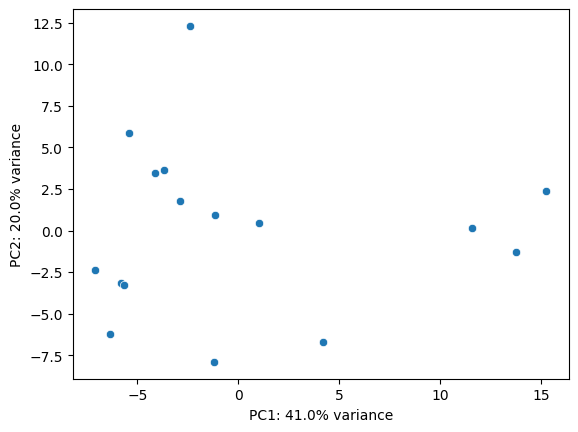

In [13]:
## Mouse PCA
# Without groups
get_pca(df = df_canonicalized_mouse_minimal_sample_col_all,
       motifs = True,
       feature_set = ['terminal1','terminal2','terminal3'],
       filepath = '.\\Python_output_files\\Figures\\PCA_Glycans_No_Groups.pdf')

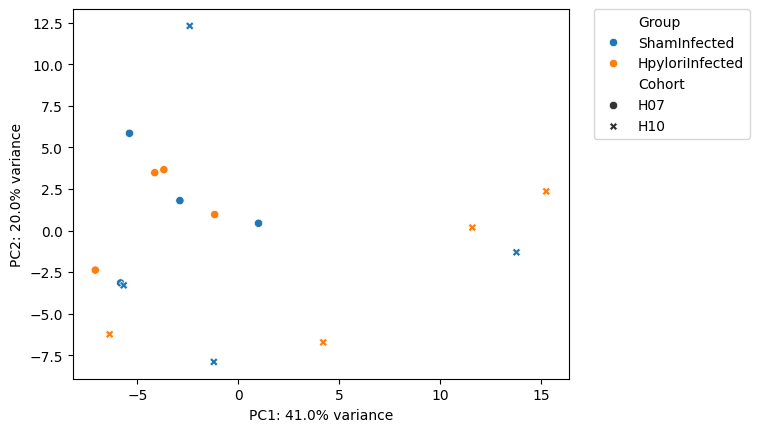

In [14]:
## Mouse PCA
# With groups and cohorts
get_pca(df = df_canonicalized_mouse_minimal_sample_col_all,
       motifs = True,
        groups = mouse_sample_metadata_all,
        color = 'Group',
        shape = 'Cohort',
       feature_set = ['terminal1','terminal2','terminal3'],
       filepath = '.\\Python_output_files\\Figures\\PCA_Glycans_Groups_And_Cohorts.pdf')

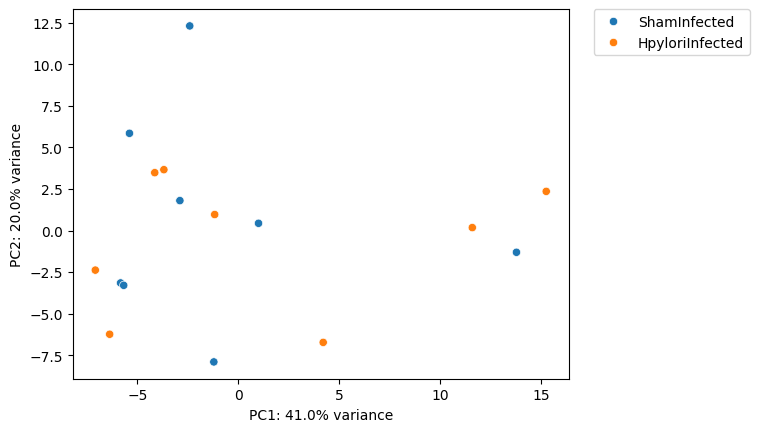

In [15]:
# With treatment groups
get_pca(df = df_canonicalized_mouse_minimal_sample_col_all,
       motifs = True,
       feature_set = ['terminal1','terminal2','terminal3'],
       groups = group_list,
       filepath = '.\\Python_output_files\\Figures\\PCA_Glycans_Treatment_Groups.pdf')

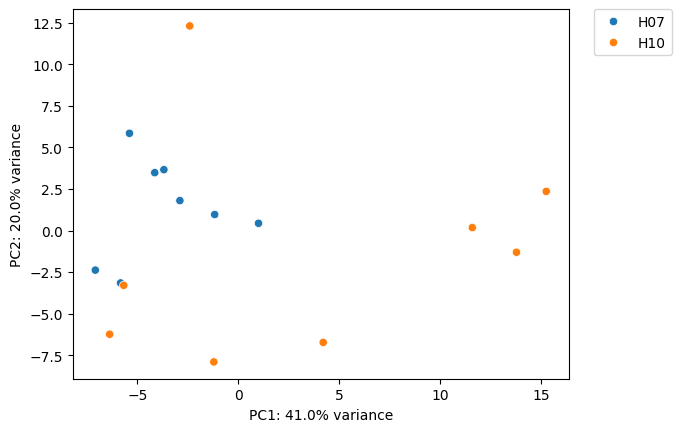

In [16]:
# With cohort groups
get_pca(df = df_canonicalized_mouse_minimal_sample_col_all,
       motifs = True,
       feature_set = ['terminal1','terminal2','terminal3'],
       groups = cohort_list,
       filepath = '.\\Python_output_files\\Figures\\PCA_Glycans_Cohort_Groups.pdf')

In [17]:
# Perform Heatmap
# svg
get_heatmap(df_canonicalized_mouse_minimal_glycan_col_all, 
            motifs=True, 
            feature_set=['terminal1','terminal2','terminal3'], 
            transform='', 
            datatype='response', 
            rarity_filter=0.05, 
            filepath='.\\Python_output_files\\Figures\\Heatmap_Glycans.svg', 
            custom_motifs=[], 
            return_plot=False,
            yticklabels = 1,
            xticklabels = 1,
            figsize=(12,30))

# pdf
get_heatmap(df_canonicalized_mouse_minimal_glycan_col_all, 
            motifs=True, 
            feature_set=['terminal1','terminal2','terminal3'], 
            transform='', 
            datatype='response', 
            rarity_filter=0.05, 
            filepath='.\\Python_output_files\\Figures\\Heatmap_Glycans.pdf', 
            custom_motifs=[], 
            return_plot=False,
            yticklabels = 1,
            xticklabels = 1,
            figsize=(12,30))

In [18]:
# Annotate heatmap with SNFG figures
annotate_figure(svg_input = ".\\Python_output_files\\Figures\\Heatmap_Glycans.svg",
                glycan_size = 'small',
                filepath = ".\\Python_output_files\\Figures\\Heatmap_Glycans_Annotated.pdf",
                compact = False)

In [20]:
# Differential glycomics on motif level
differential_glycomics_df = get_differential_expression(df = df_canonicalized_mouse_minimal_sample_col_all,
                                                                     group1 = mouse_uninfected_vehicle_sample_names,
                                                                     group2 = mouse_infected_vehicle_sample_names,
                                                                     motifs = True,
                                                                     feature_set = ['terminal1', 'terminal1', 'terminal3'],
                                                                     paired = False,
                                                                     min_samples = 0.1)
print(differential_glycomics_df)

You're working with an alpha of 0.05835541289349022 that has been adjusted for your sample size of 16.
                                      Glycan  Mean abundance    Log2FC  \
0       Terminal_GlcNAc(b1-4)Man(b1-4)GlcNAc        0.050515  1.873019   
52         Terminal_Fuc(a1-?)Gal(?1-?)GlcNAc        4.291940 -0.085659   
42      Terminal_Neu5Ac(a2-?)Gal(?1-?)GlcNAc        1.477277  0.111042   
31      Terminal_Neu5Ac(a2-3)Gal(b1-3)GalNAc        0.967288  0.130662   
10          Terminal_Fuc(a1-2)[Gal(a1-3)]Gal        0.165078 -0.207136   
34   Terminal_HexNAc(b1-4)GlcNAc(b1-6)GalNAc        0.592364 -0.073336   
38         Terminal_Gal(b1-4)GlcNAc(b1-3)Gal        1.190118 -0.090845   
44      Terminal_HexNAc(?1-?)Gal(b1-?)GlcNAc        1.694601 -0.062692   
22      Terminal_Fuc(a1-?)GlcNAc(b1-?)GalNAc        0.181372  0.217633   
41      Terminal_GlcNAc(a1-4)Gal(b1-4)GlcNAc        1.792724 -0.083474   
20    Terminal_GalNAc(b1-?)[Fuc(a1-?)]GlcNAc        0.162762  0.305667   
49   Term

In [21]:
differential_glycomics_df.to_excel('.\\Python_output_files\\Tables\\differential_glycomics.xlsx', index=False)

You're working with a default alpha of 0.05. Set sample size (n = ...) for Bayesian-Adaptive Alpha Adjustment


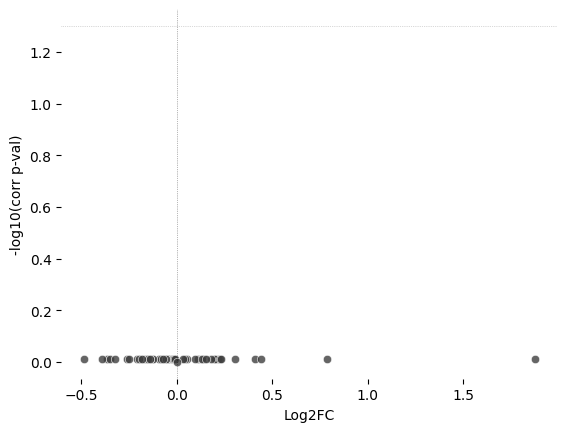

In [30]:
# Differential glycomics volcano plot
get_volcano(differential_glycomics_df,
           annotate_volcano = True,
           filepath = '.\\Python_output_files\\Figures\\Differential_Glycomics_Volcano.svg')

In [32]:
annotate_figure(svg_input = ".\\Python_output_files\\Figures\\Differential_Glycomics_Volcano.svg",
                glycan_size = 'small',
                filepath = ".\\Python_output_files\\Figures\\Differential_Glycomics_Volcano_Annotated.pdf",
                compact = False)